# Importing libraries

In [7]:
# for NLP preprocessing 
import nltk #powerful library for working with human language data.
from nltk.tokenize import word_tokenize #which is used for tokenizing (breaking down) text into individual words or tokens.
from nltk.corpus import stopwords #that are often removed from text as they don't carry significant meaning in many NLP tasks.
from gensim.models import Word2Vec #it's used for word embedding, a technique to represent words as high-dimensional vectors in a continuous vector space.

# Libraries for similarity measrures
from sklearn.metrics.pairwise import cosine_similarity 
from scipy.spatial.distance import euclidean 

# Libraries for data visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import MDS

In [8]:
# Download NLTK data
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Preparing and preprocessing the documents

In [9]:
# Read documents from files
with open('Document1.txt', 'r') as file:
    document1 = file.read()

with open('Document2.txt', 'r') as file:
    document2 = file.read()

with open('Document3.txt', 'r') as file:
    document3 = file.read()

In [10]:
print(document1)

In the heart of the ancient forest, towering trees stood sentinel, their branches interweaving in a majestic dance. Sunlight filtered through the dense canopy, casting a dappled glow on the forest floor. Birds sang harmoniously, filling the air with a symphony of nature's melodies. Creatures of the wild moved gracefully through the underbrush, each step a testament to the delicate balance of life in this enchanted woodland.

As night fell, the forest transformed into a realm of mystery. The moon cast an ethereal glow, and the rustle of leaves became a nocturnal whisper. Shadows played tricks on the imagination, and the air was thick with the scent of moss and ancient secrets. The interconnected web of life continued its nocturnal dance, unseen but ever-present.

Documenting the wonders of the natural world is a pursuit as old as time itself. Through the lens of science, we unravel the intricate tapestry of ecosystems, discovering the delicate relationships that sustain life. Each speci

In [11]:
print(document2)

Beneath the azure sky, a vast desert stretched into the horizon, its golden sands shifting with the whims of the wind. The sun beat down relentlessly, casting long shadows across the undulating dunes. The air shimmered with heat, and the only respite from the harsh conditions was the occasional oasis, a verdant jewel in the sea of aridness.

As day gave way to night, the desert underwent a transformation. The moonlit landscape took on an otherworldly glow, and the stars overhead seemed to multiply in their brilliance. Creatures adapted to the extremes of desert life emerged from their daytime hiding places, navigating the cool sands with stealth and purpose.

Exploring the mysteries of the cosmos is an endeavor that stretches the limits of human knowledge. Through powerful telescopes and cutting-edge technology, astronomers peer into the depths of space, uncovering the secrets of distant galaxies and celestial bodies. The universe, with its vastness and complexity, challenges our under

In [12]:
print(document3)

Beneath the celestial expanse, a meandering river carved its course through a lush valley, its waters glistening in the sunlight. The banks were adorned with a patchwork of wildflowers, their vibrant hues painting a picturesque scene. Trees stood as guardians along the riverbanks, their leaves whispering secrets carried by the gentle breeze.

As day surrendered to night, the valley underwent a transformation. The stars above formed a celestial mosaic, their twinkling lights mirrored in the tranquil waters below. Nocturnal creatures emerged from their hidden retreats, adding their calls and rustles to the symphony of the night. The moon cast a silvery glow, turning the landscape into a dreamscape where reality and imagination intertwined.

Exploring the realm of human creativity takes us to bustling art districts where color and form collide in a visual feast. Murals adorn the sides of buildings, telling stories of culture and expression. Galleries showcase a diverse tapestry of artisti

In [13]:
# Tokenize the documents
tokenized_document1 = word_tokenize(document1.lower())
tokenized_document2 = word_tokenize(document2.lower())
tokenized_document3 = word_tokenize(document3.lower())

In [14]:
print('tokens of document 1 : \n')
print(tokenized_document1 , '\n')

print('tokens of document 2 : \n')
print(tokenized_document2 , '\n')

print('tokens of document 3 : \n')
print(tokenized_document3 , '\n')

tokens of document 1 : 

['in', 'the', 'heart', 'of', 'the', 'ancient', 'forest', ',', 'towering', 'trees', 'stood', 'sentinel', ',', 'their', 'branches', 'interweaving', 'in', 'a', 'majestic', 'dance', '.', 'sunlight', 'filtered', 'through', 'the', 'dense', 'canopy', ',', 'casting', 'a', 'dappled', 'glow', 'on', 'the', 'forest', 'floor', '.', 'birds', 'sang', 'harmoniously', ',', 'filling', 'the', 'air', 'with', 'a', 'symphony', 'of', 'nature', "'s", 'melodies', '.', 'creatures', 'of', 'the', 'wild', 'moved', 'gracefully', 'through', 'the', 'underbrush', ',', 'each', 'step', 'a', 'testament', 'to', 'the', 'delicate', 'balance', 'of', 'life', 'in', 'this', 'enchanted', 'woodland', '.', 'as', 'night', 'fell', ',', 'the', 'forest', 'transformed', 'into', 'a', 'realm', 'of', 'mystery', '.', 'the', 'moon', 'cast', 'an', 'ethereal', 'glow', ',', 'and', 'the', 'rustle', 'of', 'leaves', 'became', 'a', 'nocturnal', 'whisper', '.', 'shadows', 'played', 'tricks', 'on', 'the', 'imagination', ',',

In [15]:
def remove_stopwords(tokenized_document):
    stop_words = set(stopwords.words('english'))
    return [token for token in tokenized_document if token.isalnum() and token not in stop_words]

In [16]:
tokenized_document1 = remove_stopwords(tokenized_document1)
tokenized_document2 = remove_stopwords(tokenized_document2)
tokenized_document3 = remove_stopwords(tokenized_document3)

print('tokens of documents after applying preprocess : ' , '\n')
print('tokens of document 1 : \n')
print(tokenized_document1 , '\n')

print('tokens of document 2 : \n')
print(tokenized_document2 , '\n')

print('tokens of document 3 : \n')
print(tokenized_document3 , '\n')

tokens of documents after applying preprocess :  

tokens of document 1 : 

['heart', 'ancient', 'forest', 'towering', 'trees', 'stood', 'sentinel', 'branches', 'interweaving', 'majestic', 'dance', 'sunlight', 'filtered', 'dense', 'canopy', 'casting', 'dappled', 'glow', 'forest', 'floor', 'birds', 'sang', 'harmoniously', 'filling', 'air', 'symphony', 'nature', 'melodies', 'creatures', 'wild', 'moved', 'gracefully', 'underbrush', 'step', 'testament', 'delicate', 'balance', 'life', 'enchanted', 'woodland', 'night', 'fell', 'forest', 'transformed', 'realm', 'mystery', 'moon', 'cast', 'ethereal', 'glow', 'rustle', 'leaves', 'became', 'nocturnal', 'whisper', 'shadows', 'played', 'tricks', 'imagination', 'air', 'thick', 'scent', 'moss', 'ancient', 'secrets', 'interconnected', 'web', 'life', 'continued', 'nocturnal', 'dance', 'unseen', 'documenting', 'wonders', 'natural', 'world', 'pursuit', 'old', 'time', 'lens', 'science', 'unravel', 'intricate', 'tapestry', 'ecosystems', 'discovering', 'de

# Creating the model

In [17]:
# Hyperparameters
vector_size = 100  # Increased vector size for richer embeddings
window_size = 5  # Reduced window size to capture closer semantic relationships
min_count = 1  # Lowered minimum count to include less frequent words
epochs = 1000

## notes :
1.  this case, it's set to 100, meaning each word in the Word2Vec model will be represented as a 100-dimensional vector. Increasing the vector size can capture more nuanced semantic relationships between words but requires more computational resources.

2. his parameter sets the maximum distance between the current and predicted word within a sentence. It defines the context or neighboring words to be considered when training the Word2Vec model. A smaller window size, such as 5 in this case, focuses on capturing closer semantic relationships within a smaller context window.

3. This parameter sets the minimum frequency count for words. Words with a frequency count lower than this value will be ignored and not included in the Word2Vec model. Setting it to 1 ensures that all words, regardless of frequency, will be considered during the training of the model. This might capture more diverse vocabulary but could also include noisy or irrelevant words.


In [18]:
# Word embeddings using Word2Vec
documents = [tokenized_document1, tokenized_document2, tokenized_document3]

# Create Word2Vec model
model = Word2Vec(sentences=documents, vector_size=vector_size, window=window_size, min_count=min_count)
model.train(documents, total_examples=len(documents), epochs=epochs)

(445584, 519000)

In [19]:
def get_doc_embedding(doc, model):
    # Get the embeddings for each word in the document
    word_embeddings = [model.wv[word] for word in doc if word in model.wv]
    
    # Return the mean of word embeddings as the document embedding
    if word_embeddings:
        return np.mean(word_embeddings, axis=0)
    else:
        # If no valid word embeddings found, return None
        return None

In [20]:
# Calculate document embeddings
doc1_embedding = get_doc_embedding(tokenized_document1, model)
doc2_embedding = get_doc_embedding(tokenized_document2, model)
doc3_embedding = get_doc_embedding(tokenized_document3, model)

In [21]:
print(doc1_embedding.shape)
print(doc2_embedding.shape)
print(doc3_embedding.shape)

(100,)
(100,)
(100,)


# Calculating similarities 

In [22]:
# Function to calculate jacard similarity
def jaccard_similarity(doc1_tokenized, doc2_tokenized):
    set1 = set(doc1_tokenized)
    set2 = set(doc2_tokenized)
    intersection_size = len(set1.intersection(set2))
    union_size = len(set1.union(set2))
    
    if union_size == 0:
        return 0  # To handle the case when both sets are empty
    
    return intersection_size / union_size

## Similarity between document 1 and 2

In [23]:
# Calculate similarity using different measures
cosine_sim_1_2 = cosine_similarity([doc1_embedding], [doc2_embedding])[0][0]
jaccard_sim_1_2  = jaccard_similarity(tokenized_document1, tokenized_document2)
euclidean_dis_1_2  = euclidean(doc1_embedding, doc2_embedding)

## Similarity between document 1 and 3

In [24]:
# Calculate similarity using different measures
cosine_sim_1_3 = cosine_similarity([doc1_embedding], [doc3_embedding])[0][0]
jaccard_sim_1_3  = jaccard_similarity(tokenized_document1, tokenized_document3)
euclidean_dis_1_3  = euclidean(doc1_embedding, doc3_embedding)

## Similarity between document 2 and 3

In [25]:
# Calculate similarity using different measures
cosine_sim_2_3 = cosine_similarity([doc2_embedding], [doc3_embedding])[0][0]
jaccard_sim_2_3  = jaccard_similarity(tokenized_document2, tokenized_document3)
euclidean_dis_2_3  = euclidean(doc2_embedding, doc3_embedding)

In [26]:
# Print the results
print(f"Cosine Similarity between document1 and document2: {cosine_sim_1_2}")
print(f"Jaccard Similarity between document1 and document2: {jaccard_sim_1_2}")
print(f"Euclidean Distance between document1 and document2: {euclidean_dis_1_2}")

Cosine Similarity between document1 and document2: 0.7271924614906311
Jaccard Similarity between document1 and document2: 0.09473684210526316
Euclidean Distance between document1 and document2: 2.2633447647094727


In [27]:
# Print the results
print(f"Cosine Similarity between document1 and document3: {cosine_sim_1_3}")
print(f"Jaccard Similarity between document1 and document3: {jaccard_sim_1_3}")
print(f"Euclidean Distance between document1 and document3: {euclidean_dis_1_3}")

Cosine Similarity between document1 and document3: 0.763283371925354
Jaccard Similarity between document1 and document3: 0.12949640287769784
Euclidean Distance between document1 and document3: 2.1232473850250244


In [28]:
# Print the results
print(f"Cosine Similarity between document2 and document3: {cosine_sim_2_3}")
print(f"Jaccard Similarity between document2 and document3: {jaccard_sim_2_3}")
print(f"Euclidean Distance between document2 and document3: {euclidean_dis_2_3}")

Cosine Similarity between document2 and document3: 0.7358986735343933
Jaccard Similarity between document2 and document3: 0.10247349823321555
Euclidean Distance between document2 and document3: 2.2590959072113037


### Cosine Similarity:
`Definition:` Cosine similarity measures the cosine of the angle between two vectors. In the context of document similarity, vectors represent the term frequency or other embeddings of words in documents.

`Range:` The range of cosine similarity is [-1, 1], where 1 indicates identical vectors, 0 means orthogonal (no similarity), and -1 indicates completely opposite directions.

`Advantages:` Not sensitive to the vector magnitude, focusing on the orientation. suitable for high-dimensional data like text.

`Disadvantages:`Ignores magnitude and may not work well when magnitude matters. Computationally intensive for large datasets due to the need for vector normalization.


### Jaccard Similarity:
`Definition:` Jaccard similarity measures the size of the intersection of two sets divided by the size of their union. In document similarity, it's often used for comparing sets of words, where the sets are formed by the unique words in each document.

`Range:` The range is [0, 1], where 1 indicates identical sets, and 0 indicates no similarity.

`Advantages:` Suitable for situations where the order of elements doesn't matter, Insensitive to the size of the sets being compared and the focus is on the presence or absence of elements.

`Disadvantages:`It does not consider the frequency or weights of elements in the sets. Not suitable for all types of data, especially when elements' weights or frequencies are important.

### Euclidean Distance:
`Definition:` Euclidean distance measures the straight-line distance between two points in Euclidean space. In the context of document similarity, it is applied to the vectors representing the documents.

`Range:` The range is [0, ∞), where 0 indicates identical points, and larger values indicate increasing dissimilarity.

`Advantages:` Intuitive geometric interpretation and Suitable for continuous data in multiple dimensions.

`Disadvantages:`Sensitive to outliers, as it calculates distances based on coordinates. Not ideal for high-dimensional data due to the curse of dimensionality. Doesn't account for the relationship between different features.

`In summary, cosine similarity is often used for text data due to its robustness to vector magnitudes, Jaccard similarity is suitable for set-based comparisons, and Euclidean distance provides a geometric interpretation but may face challenges in high-dimensional spaces. The choice depends on the nature of your data and the specific requirements of your application.`

## Visualizing heatmaps

In [29]:
# Create similarity matrices
similarity_matrix_cosine = np.array([[1.0, cosine_sim_1_2, cosine_sim_1_3],
                                     [cosine_sim_1_2, 1.0, cosine_sim_2_3],
                                     [cosine_sim_1_3, cosine_sim_2_3, 1.0]])

similarity_matrix_jaccard = np.array([[1.0, jaccard_sim_1_2, jaccard_sim_1_3],
                                      [jaccard_sim_1_2, 1.0, jaccard_sim_2_3],
                                      [jaccard_sim_1_3, jaccard_sim_2_3, 1.0]])

similarity_matrix_euclidean = np.array([[0.0, euclidean_dis_1_2, euclidean_dis_1_3],
                                      [euclidean_dis_1_2, 0.0, euclidean_dis_2_3],
                                      [euclidean_dis_1_3, euclidean_dis_2_3, 0.0]])

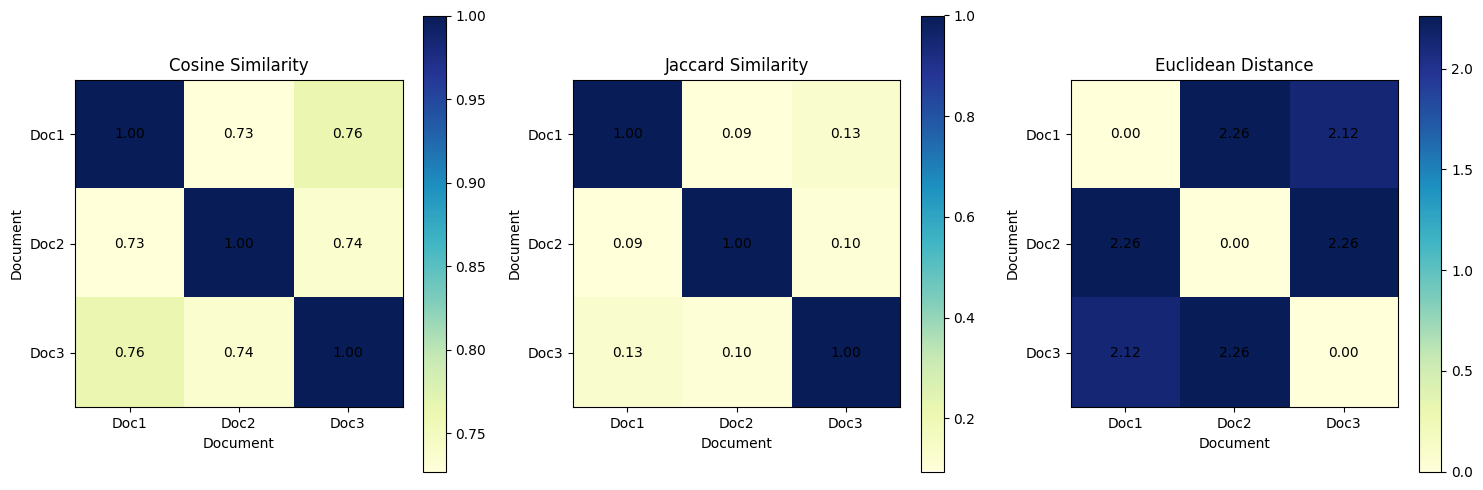

In [30]:
# List of matrices and their labels
matrices = [similarity_matrix_cosine, similarity_matrix_jaccard, similarity_matrix_euclidean]
labels = ['Cosine Similarity', 'Jaccard Similarity', 'Euclidean Distance']

# Plotting heatmaps for each similarity measure
plt.figure(figsize=(15, 5))
for i, matrix in enumerate(matrices, start=1):
    plt.subplot(1, 3, i)
    plt.title(labels[i-1])
    plt.imshow(matrix, cmap='YlGnBu', interpolation='nearest')
    plt.colorbar()

    # Annotate heatmap with values
    for x in range(matrix.shape[0]):
        for y in range(matrix.shape[1]):
            plt.text(y, x, f'{matrix[x, y]:.2f}', ha='center', va='center', color='black')

    plt.xticks([0, 1, 2], ['Doc1', 'Doc2', 'Doc3'])
    plt.yticks([0, 1, 2], ['Doc1', 'Doc2', 'Doc3'])
    plt.xlabel('Document')
    plt.ylabel('Document')

plt.tight_layout()
plt.show()

## Visualizing MDS

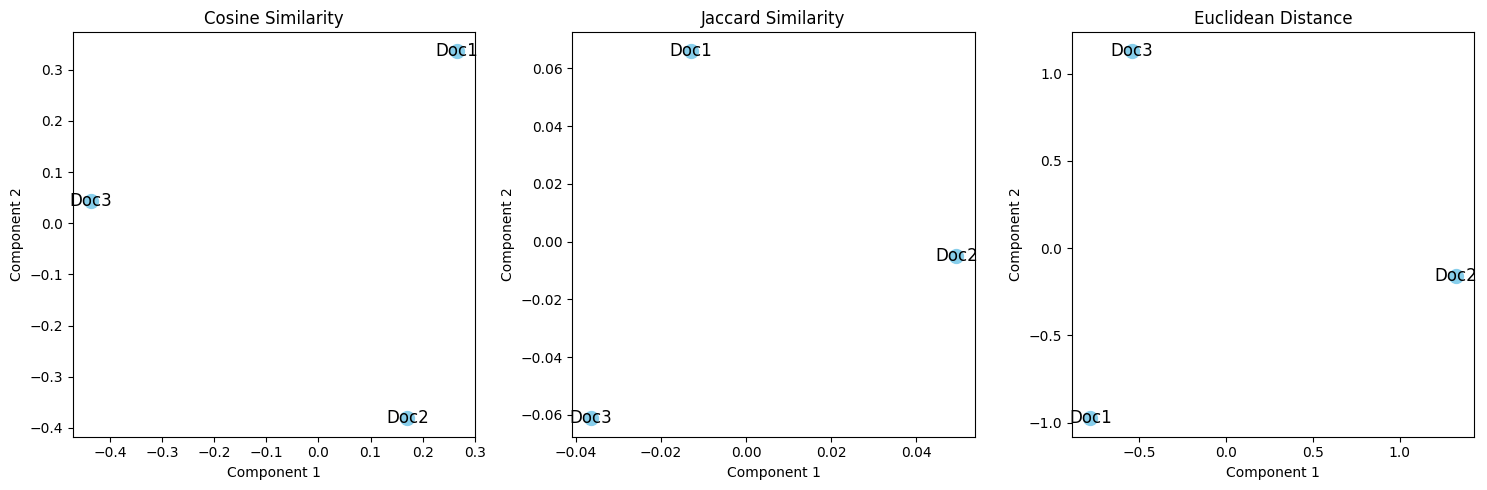

In [31]:
# Similarity matrices for different measures
similarities = [similarity_matrix_cosine, similarity_matrix_jaccard, similarity_matrix_euclidean]
measure_labels = ['Cosine Similarity', 'Jaccard Similarity', 'Euclidean Distance']

# Plotting MDS for each similarity measure
plt.figure(figsize=(15, 5))

for i, similarity_matrix in enumerate(similarities, start=1):
    # Initialize MDS with two components for 2D visualization
    mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
    # Transform similarity matrix using MDS
    embeddings = mds.fit_transform(similarity_matrix)

    plt.subplot(1, 3, i)
    plt.title(measure_labels[i-1])
    plt.scatter(embeddings[:, 0], embeddings[:, 1], c='skyblue', s=100)
    
    # Annotate points with document labels
    for label, x, y in zip(['Doc1', 'Doc2', 'Doc3'], embeddings[:, 0], embeddings[:, 1]):
        plt.text(x, y, label, ha='center', va='center', fontsize=12)

    plt.xlabel('Component 1')
    plt.ylabel('Component 2')

plt.tight_layout()
plt.show()


In summary, this code provides a visual representation of document embeddings in a two-dimensional space for three different similarity measures (cosine similarity, Jaccard similarity, and Euclidean distance) using Multidimensional Scaling. The purpose is to compare how documents are positioned relative to each other in the lower-dimensional space based on these different similarity metrics.

In [32]:
embeddings

array([[-0.78050267, -0.97492715],
       [ 1.3236464 , -0.15652437],
       [-0.54314373,  1.13145152]])

In [33]:
embeddings.shape

(3, 2)